# Lab week 2 - Linear Regression Analysis

The purpose of this TP is to practice using R for linear modeling. We will apply linear regression to two problems with data in the HSAUR package. To carry out these analyses, first install and then load the R packages HSAUR3 and gamair.

As usual, make sure that you read the help for any new functions that you use.

In [1]:
library(gamair)
library(HSAUR3)

Loading required package: tools


## Hubble data

Here, these data will be used to estimate the age of the universe. The hubble data are found in the the gamair package:

```
library(gamair) 
data(hubble) 
names(hubble) 
```
Make sure to read the help about the hubble data.

The function plot is used to make a scatterplot of velocity (y) vs. distance (x) \- read the help for plot to see how it is used. You can access the components of hubble using the `$` operator: i.e. `hubble$x` for the "x" component.

In [2]:
data(hubble)
summary(hubble)

      Galaxy         y                x        
 IC4182  : 1   Min.   :  80.0   Min.   : 2.00  
 NGC0300 : 1   1st Qu.: 616.5   1st Qu.: 8.53  
 NGC0925 : 1   Median : 827.0   Median :13.08  
 NGC1326A: 1   Mean   : 924.4   Mean   :12.05  
 NGC1365 : 1   3rd Qu.:1423.2   3rd Qu.:15.87  
 NGC1425 : 1   Max.   :1794.0   Max.   :21.98  
 (Other) :18                                   

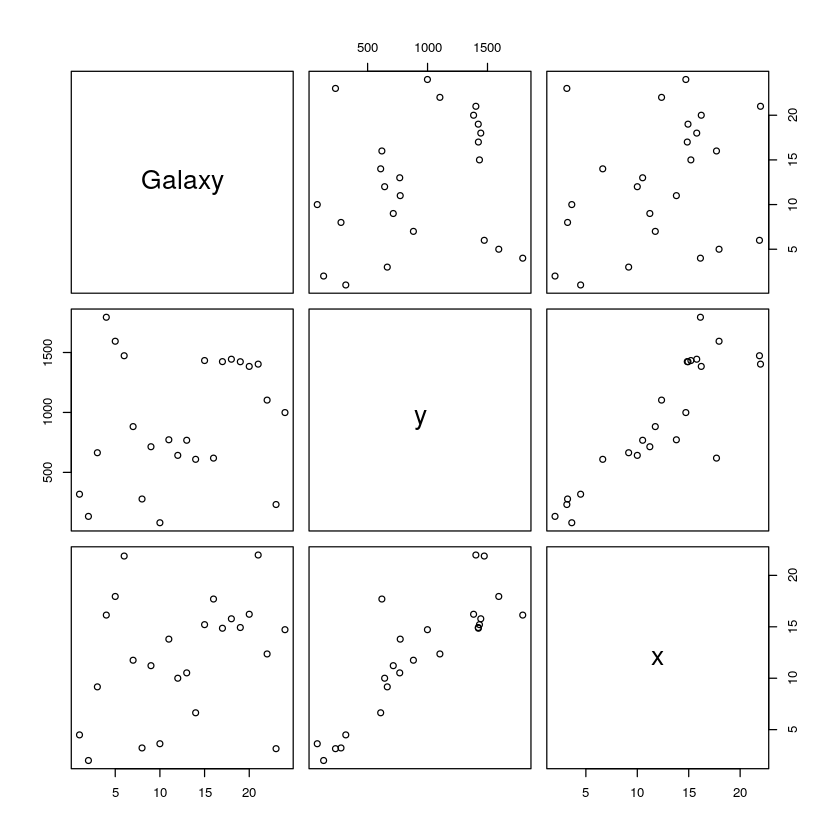

In [3]:
plot(hubble)

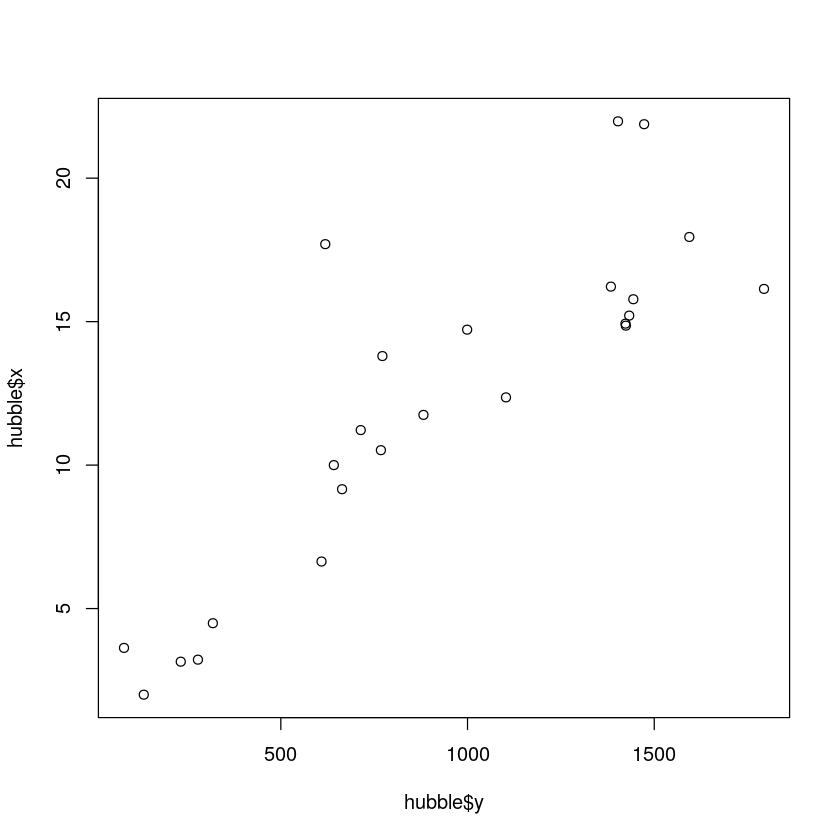

In [4]:
plot(hubble$y, hubble$x)

Now fit a linear model to predict velocity from distance. Here, we will fit without an intercept term ('-1'), as it does not make physical sense in this case.

`hmod <- lm(y ~ x - 1, data=hubble) `

and extract the estimated model coefficient via:

`coef(hmod)`

You can visualize the results with a number of plots:
```
layout(matrix(1:2,ncol=2)) 
plot(y ~ x, data = hubble) 
abline(hmod) 
plot(hmod, which = 1)
```

x 
76.58117

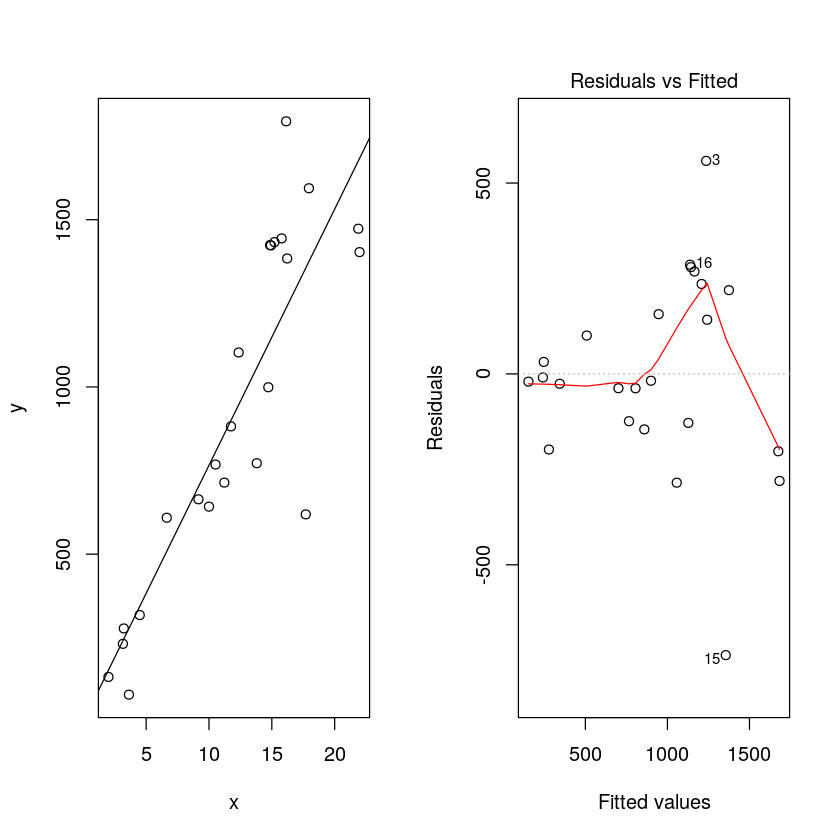

In [5]:
# Fit model
hmod <- lm(y ~ x - 1, data=hubble) 
coef(hmod)

# Visualize errors
layout(matrix(1:2,ncol=2)) 
plot(y ~ x, data = hubble) 
abline(hmod) 
plot(hmod, which = 1)

You can have a look at some of the other plot types for lm objects by varying 'which' between:
1. plot of residuals against fitted values 
2. Normal Q-Q plot
3. Scale-Location plot of sqrt(|residuals|)sqrt(|residuals|) against fitted values
4. plot of Cook's distances versus row labels
5. plot of residuals against leverages
6. plot of Cook's distances against leverage/(1-leverage). By default, the first three and 5 are provided.

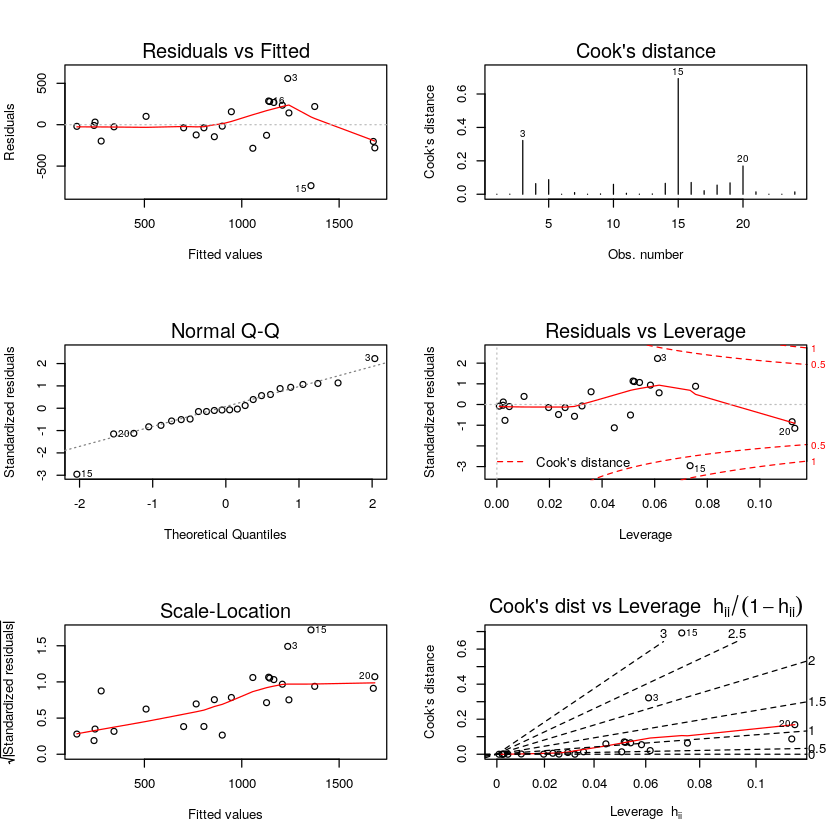

In [7]:
layout(matrix(1:6,ncol=2)) 
plot(hmod, which = 1)
plot(hmod, which = 2)
plot(hmod, which = 3)
plot(hmod, which = 4)
plot(hmod, which = 5)
plot(hmod, which = 6)

We can use the estimated coefficient to find an approximate value for the age of the universe. The Hubble constant has units of $\text{km}^{-1} \times \text{sec}^{-1} \times \text{Mpc}^{-1}$. A mega-parsec (Mpc) is $3.09 \times 10^{19}\text{km}$, so we need to divide the estimated value **b1** by this amount to obtain Hubble's constant width units of $\text{sec}^{-1}$. The approximate age of the universe in seconds will then be the inverse of this calculation (you will want to divide Mpc by the number of seconds in a year to obtain a result in years.

Carry out the appropriate calculations in R; you should obtain a result of approximately 12.8 billion years.

In [8]:
hubble.const <- coef(hmod)
hubble.const

x 
76.58117

In [13]:
seconds.year <- 60^2*24*365 # s/y
mpc <- 3.09e19 # km
mpc.s <- mpc / seconds.year
hubble.const <- coef(hmod)/mpc.s
age <- 1/hubble.const
age * 1e-9

x 
12.79469

## Cloud Seeding Data

After loading the HSAUR3 package, have a look at the clouds dataset. In this problem, we are interested in modeling rainfall as a function of seeding and other variables.

In [15]:
summary(clouds)

 seeding       time            sne          cloudcover       prewetness    
 no :12   Min.   : 0.00   Min.   :1.300   Min.   : 2.200   Min.   :0.0180  
 yes:12   1st Qu.:15.75   1st Qu.:2.612   1st Qu.: 3.750   1st Qu.:0.1405  
          Median :32.50   Median :3.250   Median : 5.250   Median :0.2220  
          Mean   :35.33   Mean   :3.169   Mean   : 7.246   Mean   :0.3271  
          3rd Qu.:55.25   3rd Qu.:3.962   3rd Qu.: 7.175   3rd Qu.:0.3297  
          Max.   :83.00   Max.   :4.650   Max.   :37.900   Max.   :1.2670  
      echomotion    rainfall     
 moving    :19   Min.   : 0.280  
 stationary: 5   1st Qu.: 2.342  
                 Median : 4.335  
                 Mean   : 4.403  
                 3rd Qu.: 5.575  
                 Max.   :12.850  

Construct boxplots of rainfall in each category for the dichotomous variables and scatterplots for the continuous variables:

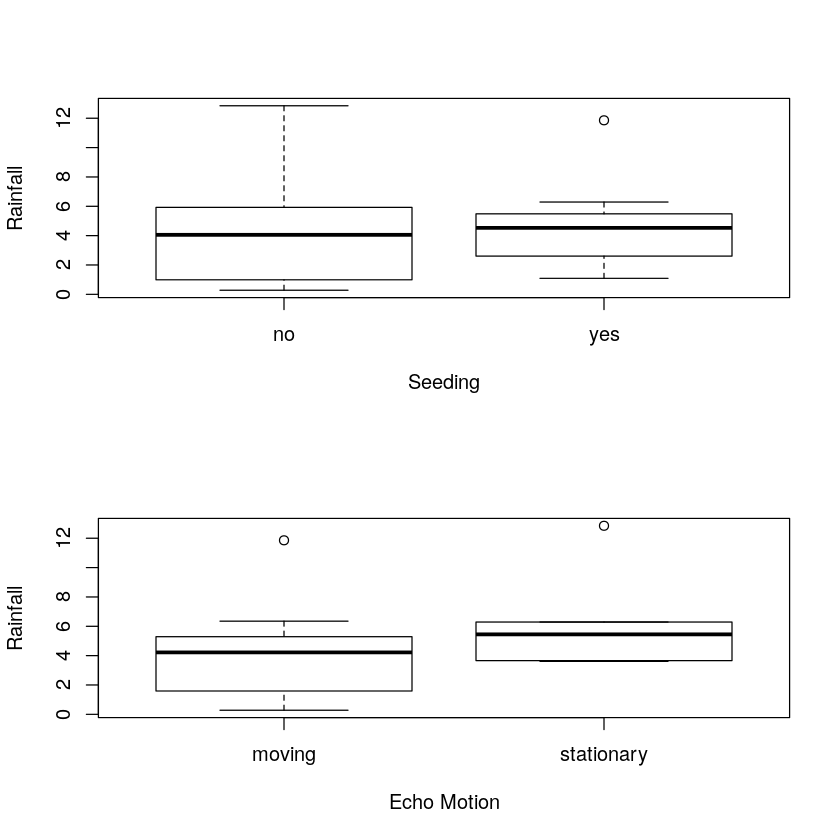

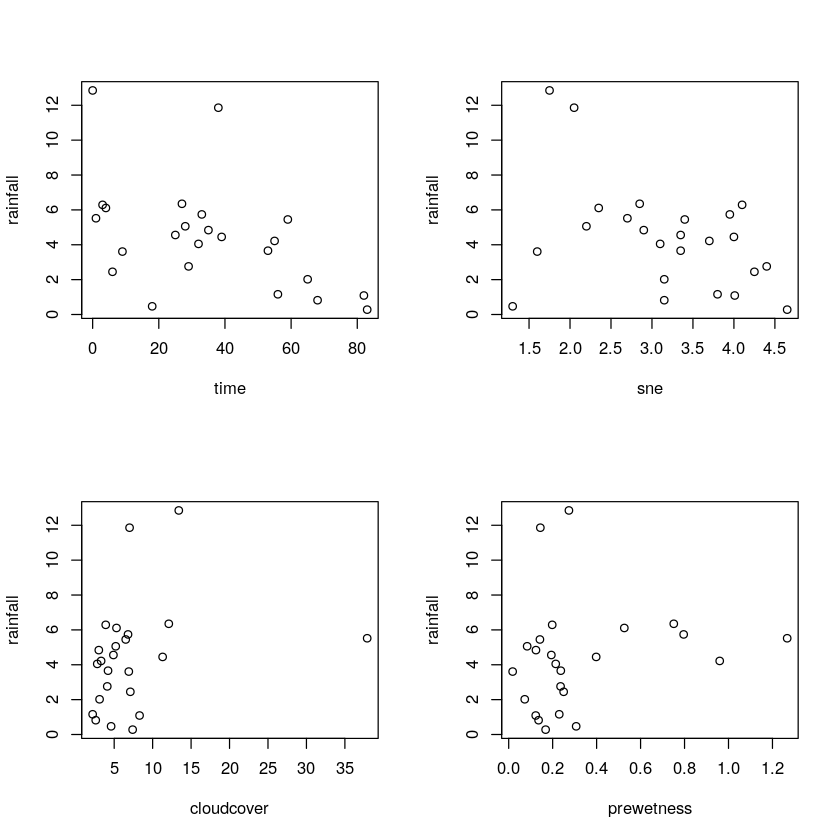

In [18]:
# BOXPLOTS
data("clouds", package = "HSAUR3") 
layout(matrix(1:2, nrow = 2))

# Boxplots of rainfall in each category for seeding
bxpseeding <- boxplot(rainfall ~ seeding, data = clouds,
    ylab = "Rainfall", xlab = "Seeding") 

# Boxplots of rainfall in each category for echo motion
bxpecho <- boxplot(rainfall ~ echomotion, data = clouds,
    ylab = "Rainfall", xlab = "Echo Motion") 

# SCATTERPLOTS
layout(matrix(1:4, nrow = 2)) 
plot(rainfall ~ time, data = clouds) 
plot(rainfall ~ cloudcover, data = clouds) 
plot(rainfall ~ sne, data = clouds) 
plot(rainfall ~ prewetness, data = clouds)

In [21]:
clouds.formula <- rainfall ~ seeding + seeding:(sne +
    cloudcover + prewetness + echomotion) + time 
clouds.lm <- lm(clouds.formula, data = clouds)

Get a summary of the model results and extract the coefficients as you did above.

What do these results suggest?


In [28]:
summary(clouds.lm)

coef(clouds.lm)


Call:
lm(formula = clouds.formula, data = clouds)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5259 -1.1486 -0.2704  1.0401  4.3913 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                     -0.34624    2.78773  -0.124  0.90306   
seedingyes                      15.68293    4.44627   3.527  0.00372 **
time                            -0.04497    0.02505  -1.795  0.09590 . 
seedingno:sne                    0.41981    0.84453   0.497  0.62742   
seedingyes:sne                  -2.77738    0.92837  -2.992  0.01040 * 
seedingno:cloudcover             0.38786    0.21786   1.780  0.09839 . 
seedingyes:cloudcover           -0.09839    0.11029  -0.892  0.38854   
seedingno:prewetness             4.10834    3.60101   1.141  0.27450   
seedingyes:prewetness            1.55127    2.69287   0.576  0.57441   
seedingno:echomotionstationary   3.15281    1.93253   1.631  0.12677   
seedingyes:echomotionstationary  2.59060    1.81

(Intercept)                      seedingyes 
                    -0.34624093                     15.68293481 
                           time                   seedingno:sne 
                    -0.04497427                      0.41981393 
                 seedingyes:sne            seedingno:cloudcover 
                    -2.77737613                      0.38786207 
          seedingyes:cloudcover            seedingno:prewetness 
                    -0.09839285                      4.10834188 
          seedingyes:prewetness  seedingno:echomotionstationary 
                     1.55127493                      3.15281358 
seedingyes:echomotionstationary 
                     2.59059513

Using the lm plotting method, you can examine diagnostic plots for these results to assess model assumptions and identify any influential points. You could instead access the residuals and fitted values and make plots with those directly if you want:

In [30]:
# Show the structure of the linear regression model
str(clouds.lm)

List of 13
 $ coefficients : Named num [1:11] -0.346 15.683 -0.045 0.42 -2.777 ...
  ..- attr(*, "names")= chr [1:11] "(Intercept)" "seedingyes" "time" "seedingno:sne" ...
 $ residuals    : Named num [1:24] 2.9857 -0.5092 -0.0385 1.4329 -0.5022 ...
  ..- attr(*, "names")= chr [1:24] "1" "2" "3" "4" ...
 $ effects      : Named num [1:24] -21.57 -1.133 -7.437 0.525 5.671 ...
  ..- attr(*, "names")= chr [1:24] "(Intercept)" "seedingyes" "time" "seedingno:sne" ...
 $ rank         : int 11
 $ fitted.values: Named num [1:24] 9.86 6.03 6.33 4.68 2.95 ...
  ..- attr(*, "names")= chr [1:24] "1" "2" "3" "4" ...
 $ assign       : int [1:11] 0 1 2 3 3 4 4 5 5 6 ...
 $ qr           :List of 5
  ..$ qr   : num [1:24, 1:11] -4.899 0.204 0.204 0.204 0.204 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:24] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:11] "(Intercept)" "seedingyes" "time" "seedingno:sne" ...
  .. ..- attr(*, "assign")= int [1:11] 0 1 2 3 3 4 4 5 5 6 ...
  .. ..- attr(*, "co

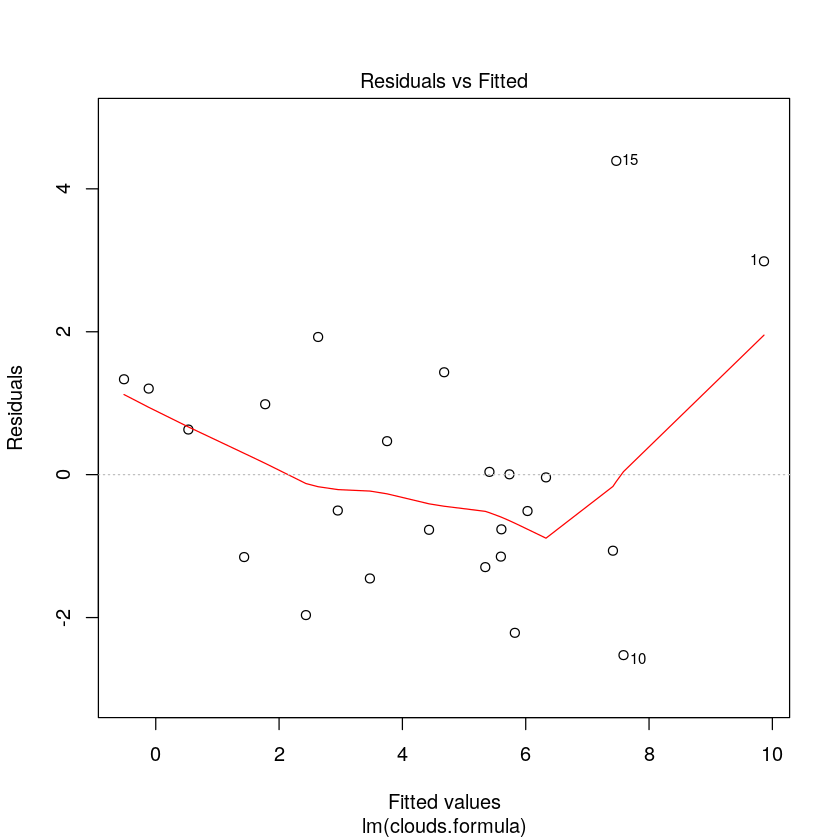

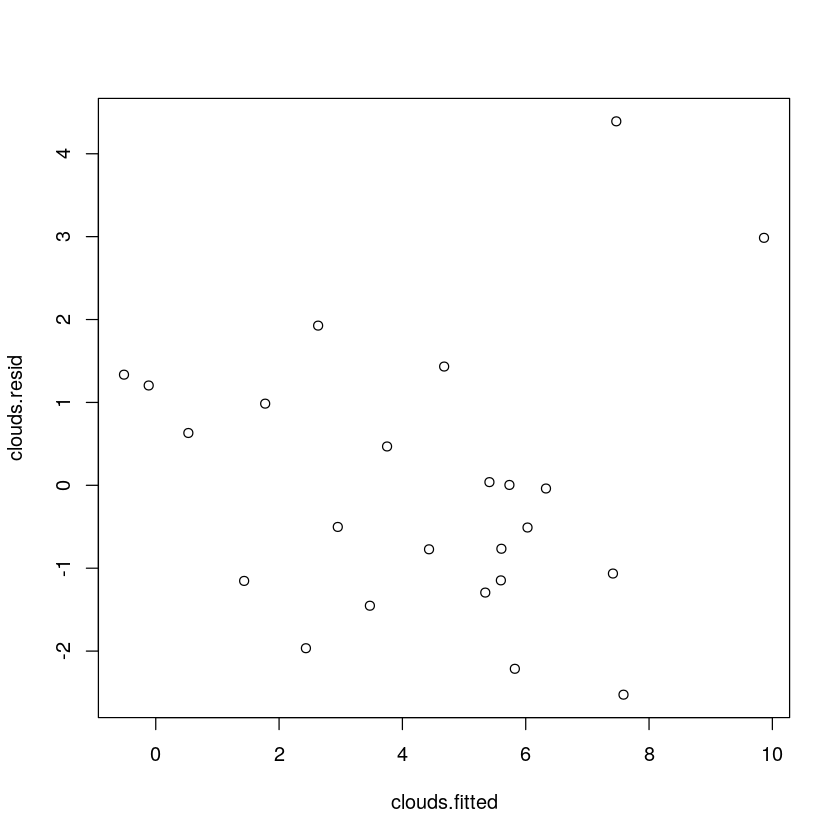

In [33]:
# OPTION A
plot(clouds.lm, which = 1)

# OPTION B
clouds.resid <- residuals(clouds.lm) 
clouds.fitted <- fitted(clouds.lm)

plot(clouds.fitted, clouds.resid)

We can also look at the regression relationship between S-Ne and rainfall with and without seeding:


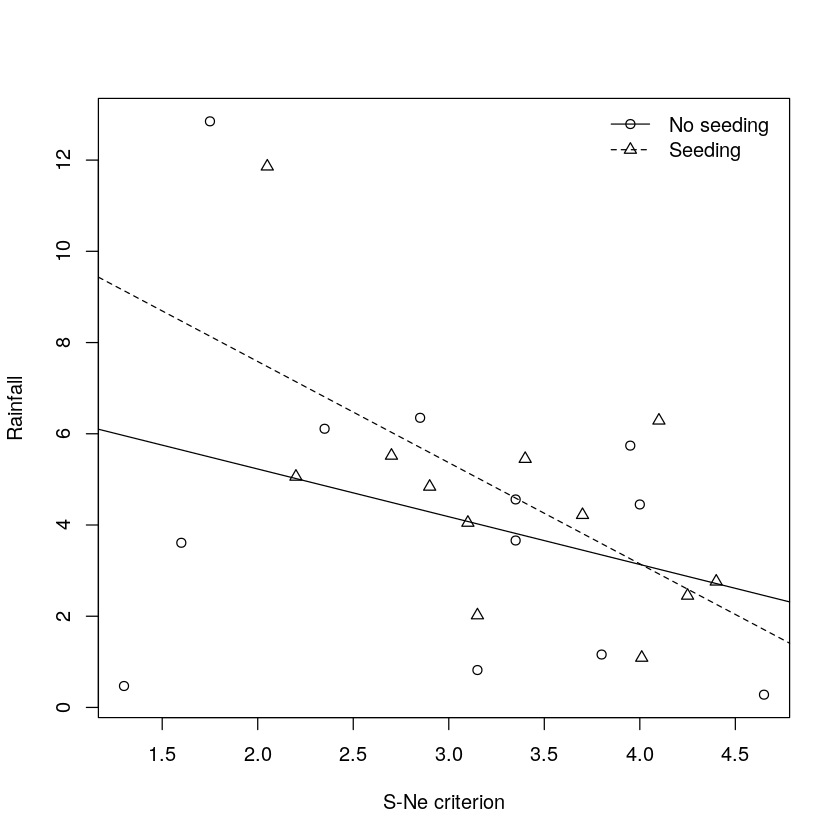

In [41]:
layout(1) 

# Convert the dichotomous (no/yes) variable into a numerical (1/2)
psymb <- as.numeric(clouds$seeding)

plot(rainfall ~ sne, data = clouds,
    pch = psymb, xlab = "S-Ne criterion", ylab = "Rainfall") 

abline(lm(rainfall ~ sne, data = clouds,
    subset = seeding == "no"))
abline(lm(rainfall ~ sne, data = clouds,
    subset = seeding == "yes"), lty = 2) # lty is the line style

legend("topright", legend = c("No seeding",
    "Seeding"), pch = 1:2, lty = 1:2, bty = "n")

Make sure you can interpret this plot. Is there an interaction between seeding and S-Ne? Explain.

```
seedingno:sne                    0.41981    0.84453   0.497  0.62742   
seedingyes:sne                  -2.77738    0.92837  -2.992  0.01040 * 
```

Yes, there is an interaction between both because the slopes of the 'seeding' and the 'no-seeding' curves are different. Also, the slopes 